In [18]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [ ]:
print(bc.DESCR)

# Dataset Info

In [ ]:
bc.target[500]

In [ ]:
bc.target.shape

In [ ]:
bc.data[500]

In [ ]:
bc.data.shape

 # Preproccessing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bc.data,bc.target, test_size=0.2)

print(f"Feature=> train: {x_train.shape} - test:{ x_test.shape}")
print(f"Label=> train: {y_train.shape} - test:{ y_test.shape}")

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)


In [ ]:
x_train

# Classification

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    p = precision_score(y_test, y_pred_test)
    r = recall_score(y_test, y_pred_test)
    
    print(f"acc_train: {acc_train} -acc_test: {acc_test} - precision: {p} - recall: {r}")
    return acc_train, acc_test, p, r

# 1.Naive bayse

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [29]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9208791208791208 -acc_test: 0.9473684210526315 - precision: 0.96 - recall: 0.96


# 2.KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree' , leaf_size=28)
knn.fit(x_train,y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,28
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [32]:
acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9736263736263736 -acc_test: 0.9824561403508771 - precision: 0.9866666666666667 - recall: 0.9866666666666667


# 3. Decisin tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion='gini')
dt.fit(x_train,y_train)



,criterion,'gini'
,splitter,'best'
,max_depth,64
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

In [35]:
acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 1.0 -acc_test: 0.9385964912280702 - precision: 0.9473684210526315 - recall: 0.96


# 4.Random Farest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8)
rf.fit(x_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,64
,min_samples_split,8
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [38]:
acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9956043956043956 -acc_test: 0.9824561403508771 - precision: 0.974025974025974 - recall: 1.0


# SVM

In [ ]:
 from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

In [40]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

In [41]:
acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9824175824175824 -acc_test: 0.9824561403508771 - precision: 1.0 - recall: 0.9733333333333334


# 6.Logistic Regression

In [42]:
from sklearn. linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [43]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [44]:
acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9692307692307692 -acc_test: 0.9824561403508771 - precision: 0.974025974025974 - recall: 1.0


# ANN

In [45]:
from sklearn.neural_network import MLPClassifier
ann= MLPClassifier(hidden_layer_sizes= 512, activation='relu', solver= 'adam')
ann.fit(x_train, y_train)

c:\Users\s\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,512
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [46]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

In [47]:
acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.989010989010989 -acc_test: 0.9736842105263158 - precision: 0.9736842105263158 - recall: 0.9866666666666667


# Comparison

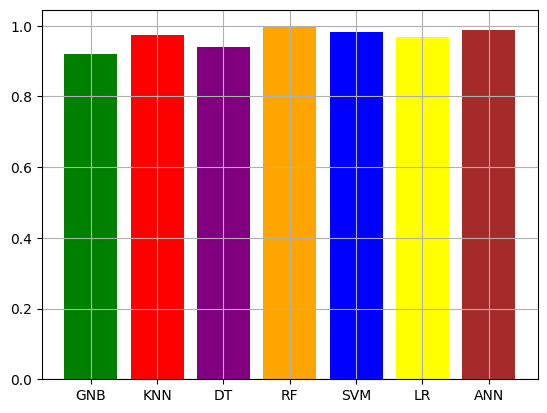

In [49]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_knn, acc_test_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['green','red', 'purple', 'orange', 'blue', 'yellow', 'brown']
plt.bar(title, acc_train, color = colors)
plt.grid()
plt.show()


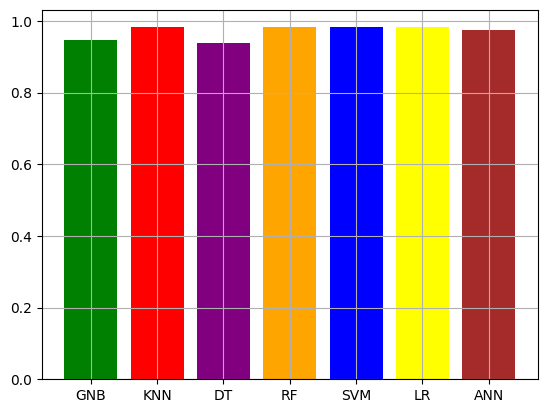

In [50]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['green','red', 'purple', 'orange', 'blue', 'yellow', 'brown']
plt.bar(title, acc_test, color = colors)
plt.grid()
plt.show()

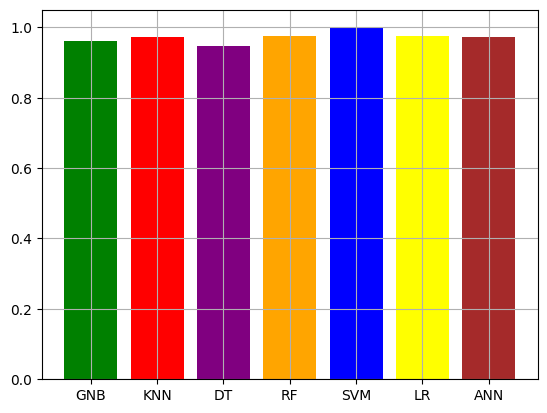

In [ ]:
p = [p_gnb, acc_train_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['green','red', 'purple', 'orange', 'blue', 'yellow', 'brown']
plt.bar(title, acc_train, color = colors)
plt.grid()
plt.show()

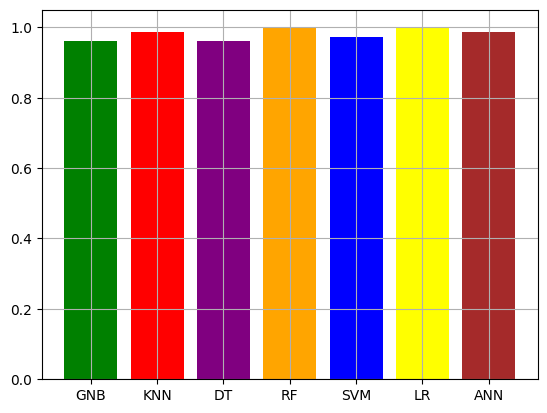

In [52]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['green','red', 'purple', 'orange', 'blue', 'yellow', 'brown']
plt.bar(title, r, color = colors)
plt.grid()
plt.show()